<a href="https://colab.research.google.com/github/AJ-CE888/Ce888/blob/master/Lab_4_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Code :
# 1. Plot histogram of the label "y_yes"
# 2. Uses ExtraTreesClassifier with 1000 estimators on the data 
# with outcome/output variable "y"
# 3. Report the results of 10-Kfold stratified cross-validation
# 4. Get sample importances and a confusion matrix

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Read and Convert the dummies to df_dummies

df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
df_dummies = pd.get_dummies(df)

In [ ]:
del df_dummies["y_no"]
del df_dummies["duration"]

In [99]:
# Plot histogram of the label "y_yes"

plt.hist(df_dummies["y_yes"], color='b')

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

In [ ]:
y_df = df_dummies["y_yes"]
X_df = df_dummies
del X_df["y_yes"]


In [ ]:
# Uses ExtraTreesClassifier with 1000 estimators on the data 
# with outcome/output variable "y"

clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
clf.fit(X_df,y_df)

In [ ]:
# Report the results of 10-Kfold stratified cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_df, y_df, cv=10)
scores

[ 2 61  7  8  4 60  6  5 49 50 43 52 42 59  3 53 33 48 44 10 14 34  0 17
 47 46 45 51 55 27 23 31  1 22 57 16 32 20 56 28 54 58  9 25 21 18 11 39
 26 15 30 38 41 37 36 40 12 13 19 24 29 35]
Feature ranking:


(0, 0.4695330258763523)

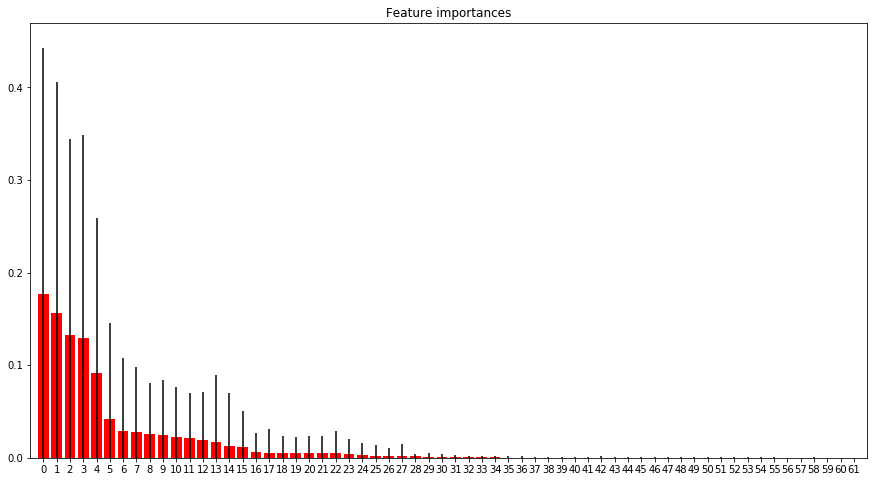

In [104]:
# Get sample importances

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_df.shape[1]),)
plt.xlim([-1, X_df.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])


In [ ]:
# confusion matrix function

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


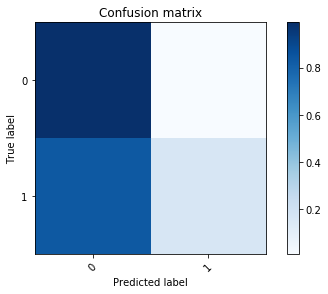

In [109]:
# Get sample confusion matrix

y_pred = clf.predict(X_df)
cnf_matrix = confusion_matrix(y_df, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_df))), normalize = True, title='Confusion matrix')